### Задание 1.3.1

[9 2 7] [4 4 5] [ 9  1 -1] [9 8 0]
5.744562646538029
8.06225774829855
9.219544457292887
8.366600265340756
8.12403840463596
7.0710678118654755


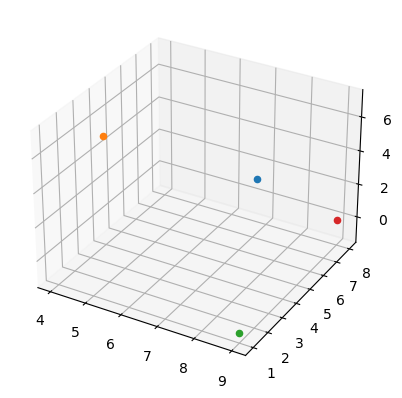

In [4]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def e_d(t1, t2):
    return sum((x - y) ** 2 for x, y in zip(t1, t2)) ** 0.5

t1 = np.array([randint(-10, 10), randint(-10, 10), randint(-10, 10)])
t2 = np.array([randint(-10, 10), randint(-10, 10), randint(-10, 10)])
t3 = np.array([randint(-10, 10), randint(-10, 10), randint(-10, 10)])
t4 = np.array([randint(-10, 10), randint(-10, 10), randint(-10, 10)])

print(t1,t2,t3,t4)

print(e_d(t1, t2))
print(e_d(t1, t3))
print(e_d(t1, t4))
print(e_d(t2, t3))
print(e_d(t2, t4))
print(e_d(t3, t4))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(t1[0], t1[1], t1[2])
ax.scatter(t2[0], t2[1], t2[2])
ax.scatter(t3[0], t3[1], t3[2])
ax.scatter(t4[0], t4[1], t4[2])
plt.show()

### Задание 1.3.2

In [8]:
z = np.zeros((5, 5))
z += np.arange(5)
z

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

### 2.3.1 Задание

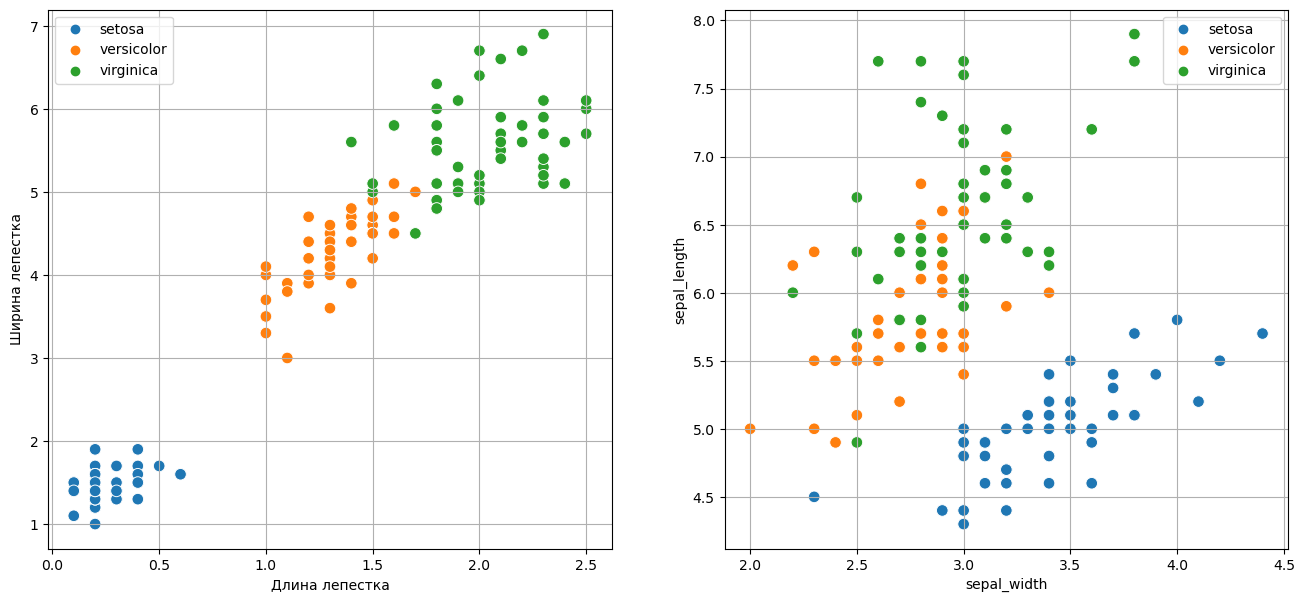

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

plt.figure(figsize=(16, 7))

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width',
    y='petal_length',
    hue='species',
    s=70
)

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width',
    y='sepal_length',
    hue='species',
    s=70
)
plt.legend()
plt.grid()


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.20
)

In [5]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
80,5.5,2.4,3.8,1.1
139,6.9,3.1,5.4,2.1
65,6.7,3.1,4.4,1.4
52,6.9,3.1,4.9,1.5
47,4.6,3.2,1.4,0.2


In [6]:
Y_train.head()

80     versicolor
139     virginica
65     versicolor
52     versicolor
47         setosa
Name: species, dtype: object

In [8]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica'], dtype=object)

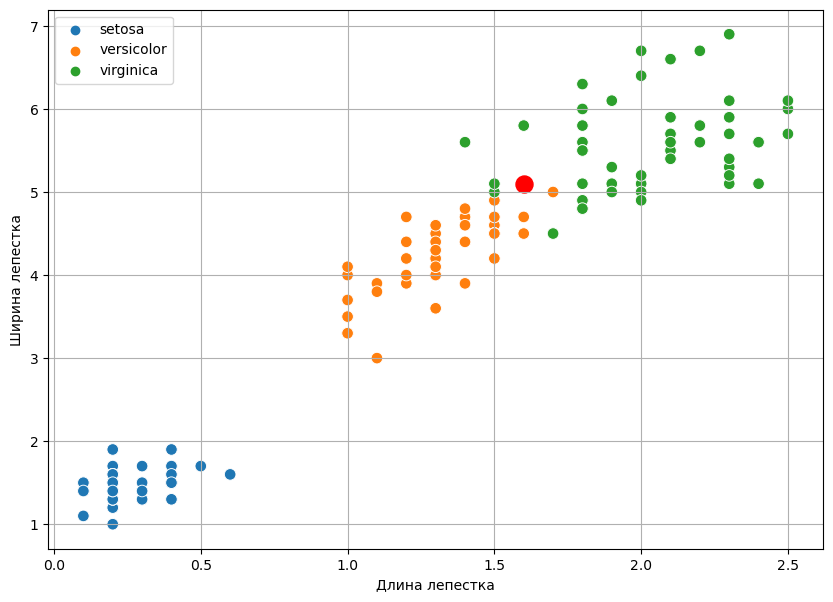

In [11]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=iris,
    x='petal_width',
    y='petal_length',
    hue='species',
    s=70
)
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend(loc=2)
plt.grid()

for i in range(len(Y_test)):
    if np.array(Y_test)[i] != Y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)


In [12]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(Y_test, Y_pred) :.3}')

accuracy: 0.967


In [20]:
def func(k, p):
    X_train, X_test, Y_train, Y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = p
    )
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=iris,
        x='petal_width',
        y='petal_length',
        hue='species',
        s=70
    )
    plt.xlabel('Длина лепестка')
    plt.ylabel('Ширина лепестка')
    plt.legend(loc=2)
    plt.grid()

    for i in range(len(Y_test)):
        if np.array(Y_test)[i] != Y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
            
    print(f'accuracy: {accuracy_score(Y_test, Y_pred) :.3}')


accuracy: 1.0


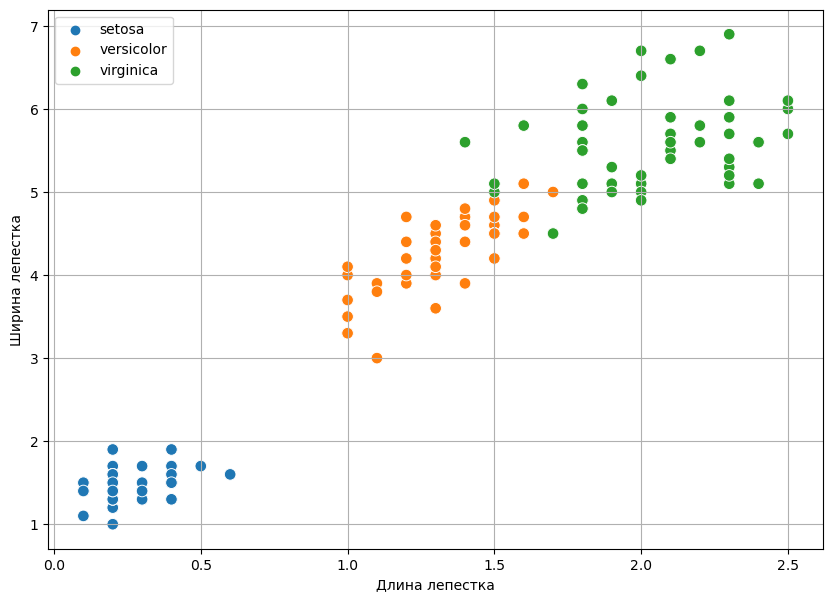

In [21]:
func(1, 0.15)

accuracy: 0.933


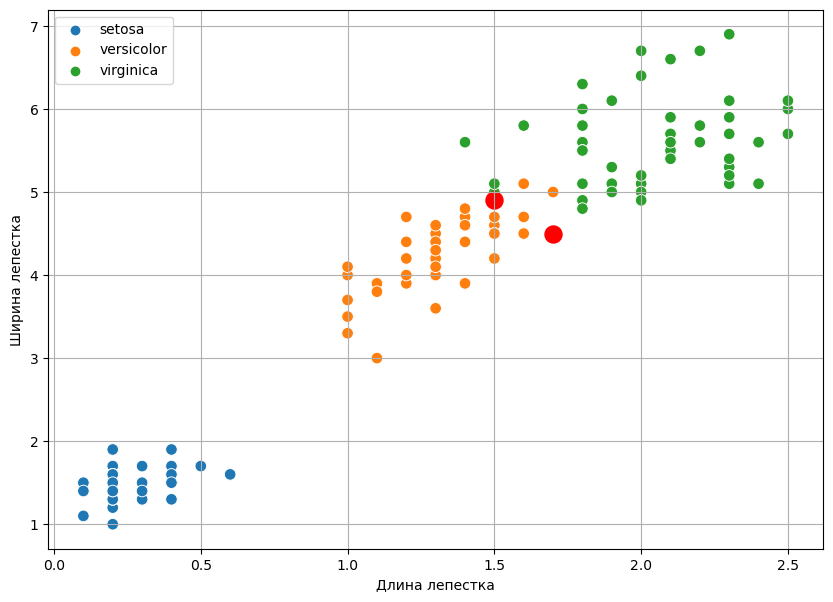

In [22]:
func(5, 0.20)

accuracy: 1.0


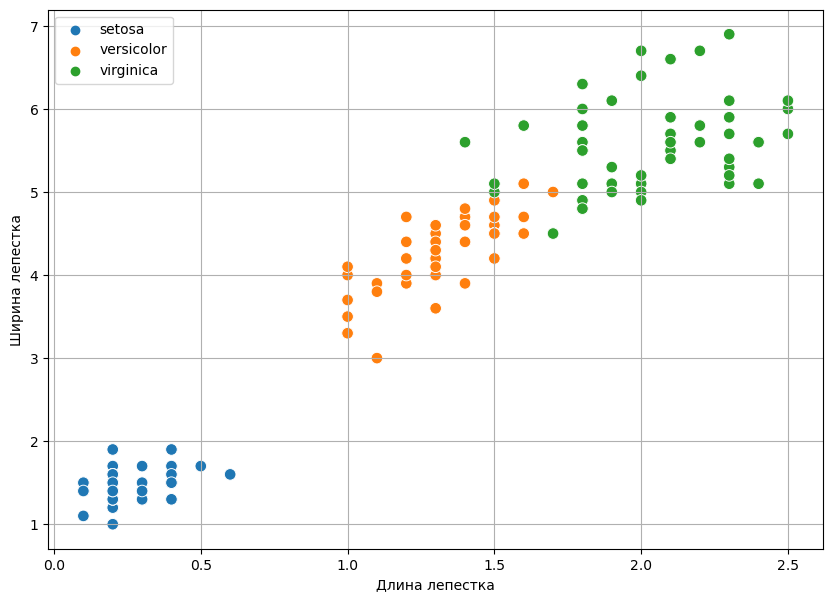

In [23]:
func(10, 0.15)

### 3.3.2 Задание

In [51]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

df = pd.DataFrame({"Цвет глаз":["Синий", "Карий", "Черный", "Зеленый",
                                "Синий", "Голубой", "Карий", "Черный"]})

scale_mapper = dict()

unique = df["Цвет глаз"].unique()

for i in range(len(unique)):
    scale_mapper.update({unique[i] : i + 1})

df = df.replace(scale_mapper)
df

,Цвет глаз
0,1
1,2
2,3
3,4
4,1
5,5
6,2
7,3
